In [123]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [124]:
from scipy.optimize import minimize
def f(x):
    return (x-3)**2
res = minimize(f,2)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [125]:
res.x[0]

2.999999992549203

In [126]:
f = lambda x: (x[0] - 1)**2 + (x[1]-2.5)**2
cons = ({"type": "ineq", "fun":lambda x: x[0]-2*x[1]+2},
        {"type": "ineq", "fun":lambda x: -x[0]-2*x[1]+6},
        {"type": "ineq", "fun":lambda x: -x[0]+2*x[1]+2})
bnds = ((0, None), (0, None))
res = minimize(f,(2,0), bounds=bnds, constraints=cons)
res.x

array([1.4, 1.7])

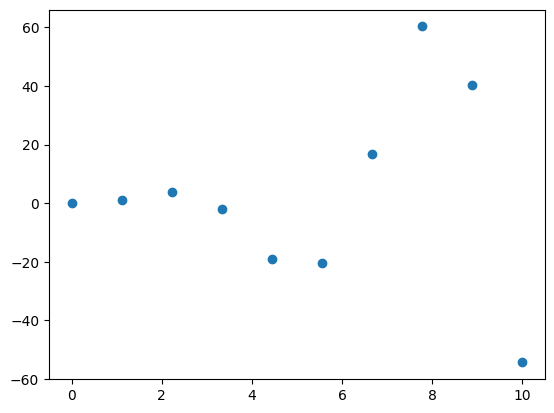

In [127]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [128]:
from scipy.interpolate import interp1d

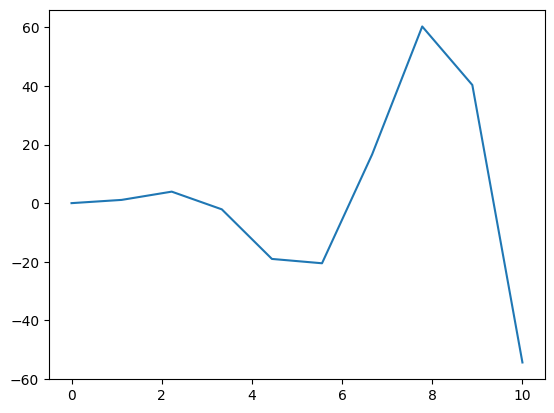

In [129]:
f = interp1d(x, y, kind='linear')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)


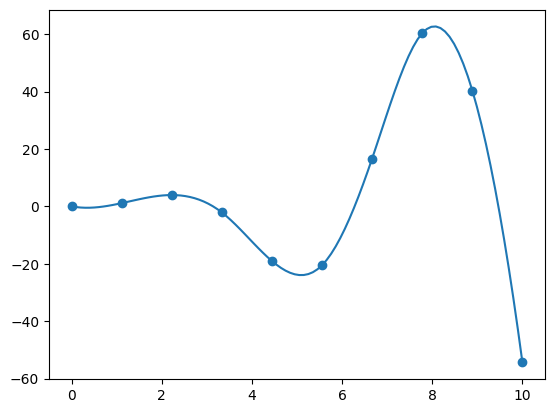

In [130]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)
plt.scatter(x, y)

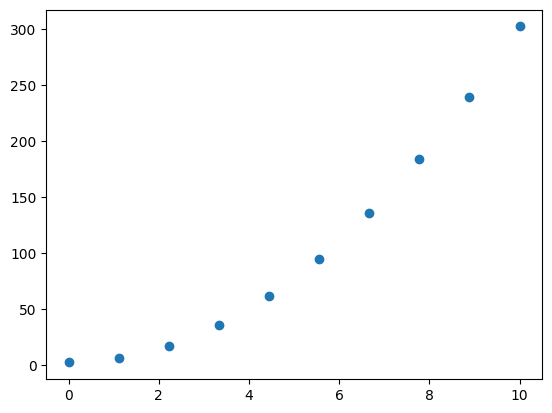

In [131]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data, y_data)

In [132]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, x_data, y_data, p0=(1,1))
popt

array([3., 2.])

In [133]:
#SPRING MOTION FIND NATURAL FREQUENCY
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

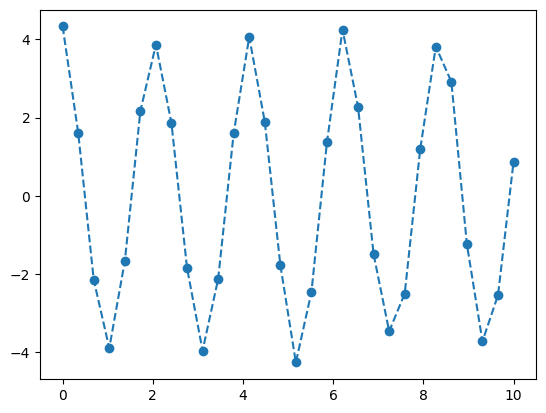

In [134]:
plt.plot(t_data,y_data,'o--')

In [135]:
def func(x, A, w, phi):
    return A*np.cos(w*x + phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4,np.pi,0))
popt

array([3.94836219, 2.99899521, 0.10411352])

In [136]:
A, w, phi = popt

In [137]:
w

2.998995205451252

In [138]:
np.sqrt(np.diag(pcov))    # variance

array([0.05117448, 0.00430857, 0.02575701])

In [139]:
t = np.linspace(0,10,500)
y = func(t,A,w,phi)

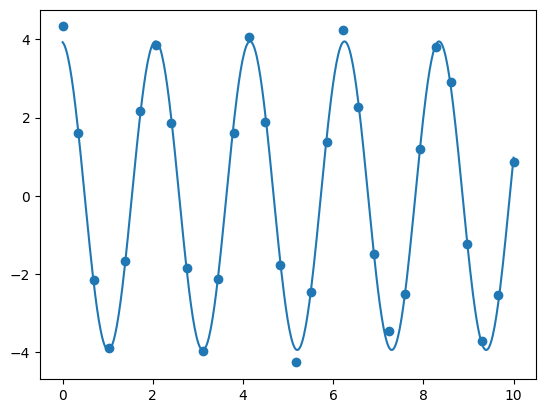

In [140]:
plt.scatter(t_data, y_data)
plt.plot(t,y)

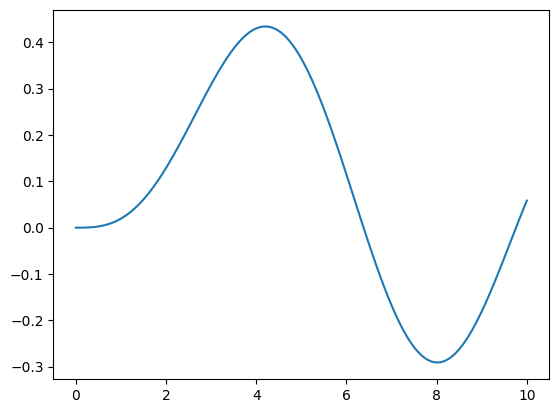

In [141]:
#laplace eq in polar coords

from scipy.special import jv
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3,x))
plt.show()

In [142]:
from scipy.misc import derivative


In [143]:
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)
print(f(x))


[0.00000000e+00 2.04036590e-06 1.61555818e-05 5.39587446e-05
 1.26556477e-04 2.44546577e-04 4.18016374e-04 6.56541790e-04
 9.69187061e-04 1.36450513e-03 1.85053869e-03 2.43482180e-03
 3.12438217e-03 3.92574397e-03 4.84493124e-03 5.88747186e-03
 7.05840197e-03 8.36227100e-03 9.80314713e-03 1.13846232e-02
 1.31098232e-02 1.49814089e-02 1.70015873e-02 1.91721181e-02
 2.14943220e-02 2.39690887e-02 2.65968857e-02 2.93777676e-02
 3.23113853e-02 3.53969952e-02 3.86334699e-02 4.20193078e-02
 4.55526434e-02 4.92312584e-02 5.30525920e-02 5.70137521e-02
 6.11115265e-02 6.53423940e-02 6.97025361e-02 7.41878483e-02
 7.87939520e-02 8.35162058e-02 8.83497180e-02 9.32893579e-02
 9.83297679e-02 1.03465376e-01 1.08690406e-01 1.13998891e-01
 1.19384688e-01 1.24841482e-01 1.30362807e-01 1.35942051e-01
 1.41572472e-01 1.47247208e-01 1.52959289e-01 1.58701648e-01
 1.64467134e-01 1.70248519e-01 1.76038518e-01 1.81829789e-01
 1.87614954e-01 1.93386603e-01 1.99137307e-01 2.04859629e-01
 2.10546135e-01 2.161894

C:\Users\simon\AppData\Local\Temp\ipykernel_4464\2924719609.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6))
C:\Users\simon\AppData\Local\Temp\ipykernel_4464\2924719609.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  plt.plot(x, derivative(f, x, dx=1e-6, n=2)) #n = higher order of derivative


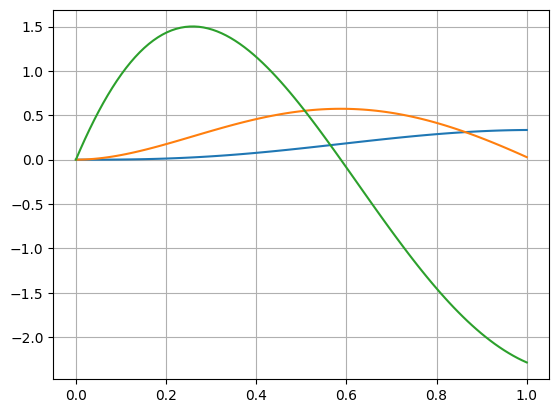

In [144]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6))
plt.plot(x, derivative(f, x, dx=1e-6, n=2)) #n = higher order of derivative
plt.grid()

In [145]:
from scipy.integrate import quad


In [146]:
integrand = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)
integral

0.14558175869954834

In [147]:
from scipy.integrate import dblquad


In [148]:
integrand = lambda y, x: np.sin(x+y**2)
lwr_y = lambda x: -x        # upper and lower er grenseverdiene til y
upr_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)   #først ytterste integralet
integral

0.590090324408853

In [149]:
# differential equations
from scipy.integrate import odeint
#solving v' - av^2 + b = 0 v[0]=0

In [150]:
def dvdt(v,t):
    return 3*v**2 - 5   #dummy variables
v0 = 0
t= np.linspace(0,1,100)
sol = odeint(dvdt,v0,t)
sol.T[0]   #transposed

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

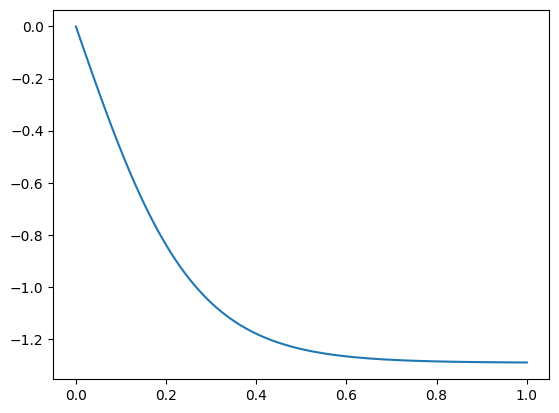

In [151]:
plt.plot(t, sol.T[0])

In [152]:
#coupled first order ode
def dSdx(S,x):
    y1, y2 = S
    return [y1+y2**2+3*x,
    3*y1+y2**3-np.cos(x)]
y1_0=0
y2_0=0
S_0 = (y1_0, y2_0)

In [153]:
x = np.linspace(0,1,100)
sol = odeint(dSdx, S_0, x)
y1 = sol.T[0]
y2 = sol.T[1]


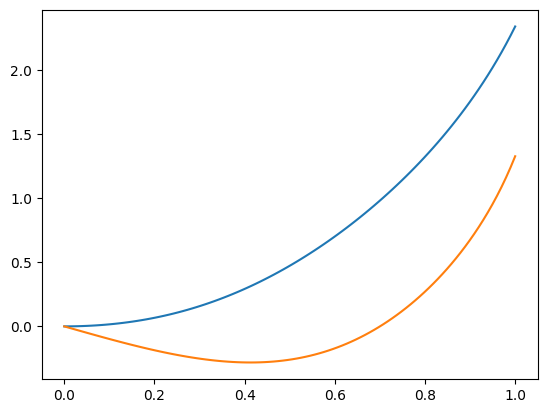

In [154]:
plt.plot(x,y1)
plt.plot(x,y2)

In [155]:
# second order ode split into 2 coupled first order diff equations
# (scipy cant solve second order)
# \ddot{theta}- sin(\theta) = 0


In [156]:
def dSdt(S, t):
    theta, omega = S
    return [omega,
            np.sin(theta)]
theta0 = np.pi/4
omega0 = 0
S0 = (theta0, omega0)

In [157]:
t = np.linspace(0,20,100)
sol = odeint(dSdt, S0, t)
theta, omega = sol.T


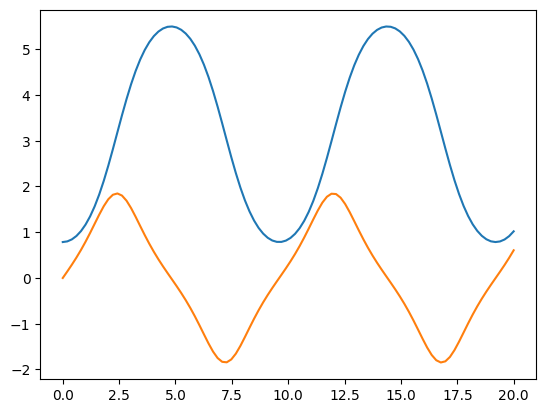

In [158]:
plt.plot(t, theta)
plt.plot(t, omega)

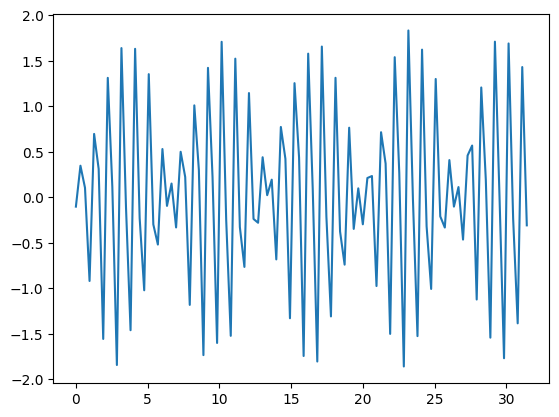

In [191]:
#fourier transform (discrete FT)
x = np.linspace(0, 10*np.pi, 100) #t
y = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x)) #x
plt.plot(x, y)



In [194]:
from scipy.fft import fft, fftfreq
N = len(y)
yf = fft(y)[:N//2]  #n//2 makes os we only see positive side 
xf = fftfreq(N, np.diff(x)[0])[:N//2]

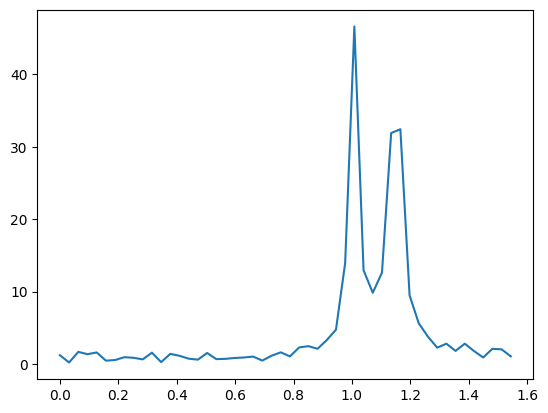

In [195]:
plt.plot(xf, np.abs(yf))
plt.show()

In [197]:
#newtons law of cooling
t_m = np.array([ 0.,  1.04347826,  2.08695652,  3.13043478,  4.17391304,
        5.2173913 ,  6.26086957,  7.30434783,  8.34782609,  9.39130435,
       10.43478261, 11.47826087, 12.52173913, 13.56521739, 14.60869565,
       15.65217391, 16.69565217, 17.73913043, 18.7826087 , 19.82608696,
       20.86956522, 21.91304348, 22.95652174, 24.        ])

temp_m = np.array([283.2322975, 284.6945461, 286.2259041, 287.8603625, 289.6440635,
       291.6187583, 293.7939994, 296.1148895, 298.4395788, 300.5430675,
       302.1566609, 303.0363609, 303.0363609, 302.1566609, 300.5430675,
       298.4395788, 296.1148895, 293.7939994, 291.6187583, 289.6440635,
       287.8603625, 286.2259041, 284.6945461, 283.2322975])

Text(0, 0.5, 'Temperature [K]')

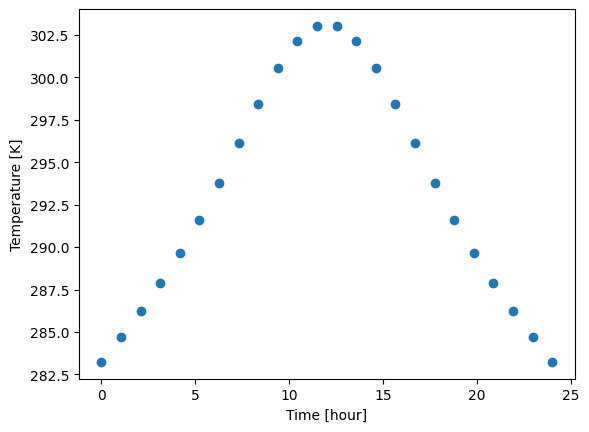

In [198]:
plt.scatter(t_m, temp_m)
plt.xlabel('Time [hour]')
plt.ylabel('Temperature [K]')

In [201]:
Ts = interp1d(t_m, temp_m, kind='cubic')

In [202]:
def dTdt(T, t):
    return -0.5*(T-Ts(t))

In [205]:
times = np.linspace(1, 23, 1000)
T0 = 284.6945461
sol = odeint(dTdt, T0, times).T[0]

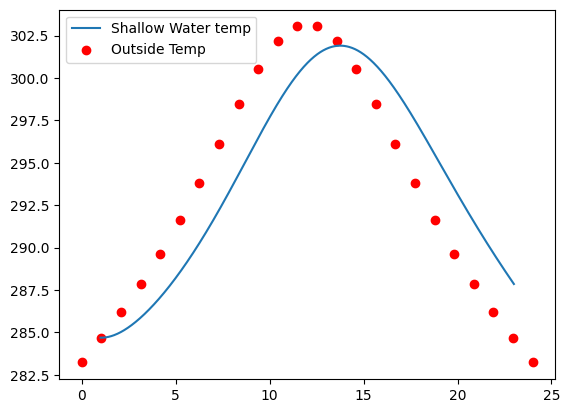

In [206]:
plt.plot(times, sol, label='Shallow Water temp')
plt.scatter(t_m, temp_m, color='r', label='Outside Temp')
plt.legend()

In [209]:
from scipy.linalg import solve_triangular
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])
x = solve_triangular(a, b, lower=True)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

In [210]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])    # First column of T
r = np.array([1, -1, -2, -3])  # First row of T
b = np.array([1, 2, 2, 5])

x = solve_toeplitz((c, r), b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

In [211]:
from scipy.linalg import eigh_tridiagonal

In [212]:
d = 3*np.ones(4)
e = -1*np.ones(3)
w, v = eigh_tridiagonal(d, e)

In [213]:
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
A

array([[ 3., -1.,  0.,  0.],
       [-1.,  3., -1.,  0.],
       [ 0., -1.,  3., -1.],
       [ 0.,  0., -1.,  3.]])

In [214]:
#statistics
from scipy.stats import beta

In [218]:
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
mean, var

(0.44642857142857145, 0.03744395485466914)

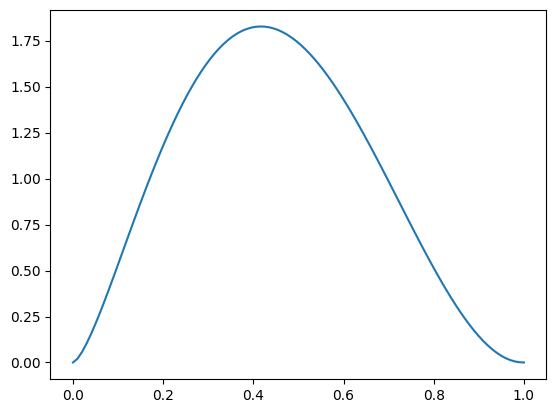

In [219]:
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)  # could do between 0 and 1
plt.plot(x, beta.pdf(x, a, b))

In [220]:
r = beta.rvs(a, b, size=10)
r

array([0.58866682, 0.44207689, 0.33490542, 0.1895429 , 0.33767745,
       0.48510249, 0.26880364, 0.58450554, 0.66702304, 0.65939268])

In [222]:
#example 2
from scipy.stats import norm

In [225]:
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments='mv')
mean, var


(1.0, 4.0)

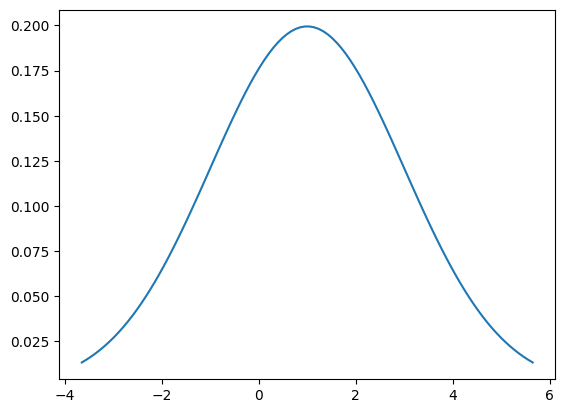

In [226]:
x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))